In [1]:
#using Clustering
using VideoIO
using Images
using ParallelKMeans
using Plots

In [3]:
path = "../../data/movies/4arenas_noQR.h264"
video = VideoIO.openvideo(path)

VideoReader(...)

  likely near /Users/gert-janboth/.julia/packages/IJulia/DrVMH/src/kernel.jl:52
  likely near /Users/gert-janboth/.julia/packages/IJulia/DrVMH/src/kernel.jl:52
  likely near /Users/gert-janboth/.julia/packages/IJulia/DrVMH/src/kernel.jl:52
  likely near /Users/gert-janboth/.julia/packages/IJulia/DrVMH/src/kernel.jl:52


In [29]:
for image in range(1, stop=5)
    img = read(video)
    print(size(img))
end

(1080, 1280)(1080, 1280)(1080, 1280)(1080, 1280)(1080, 1280)

  likely near /Users/gert-janboth/.julia/packages/IJulia/DrVMH/src/kernel.jl:52
in retrieve at /Users/gert-janboth/.julia/packages/VideoIO/zxuKH/src/avio.jl
  likely near /Users/gert-janboth/.julia/packages/IJulia/DrVMH/src/kernel.jl:52
in retrieve at /Users/gert-janboth/.julia/packages/VideoIO/zxuKH/src/avio.jl


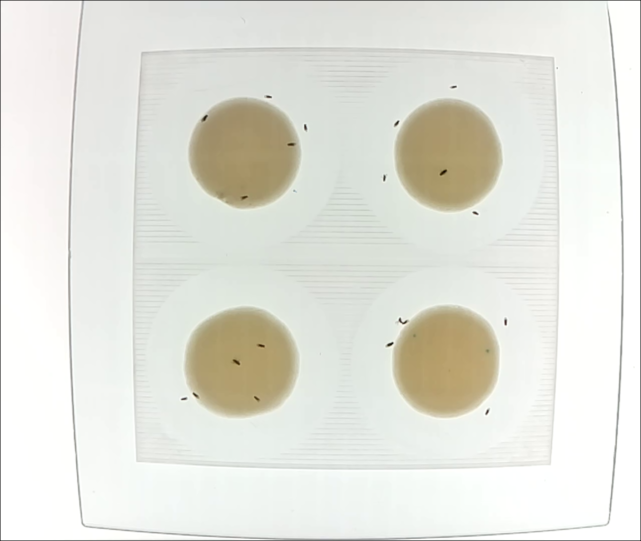

In [5]:
image = read(video)

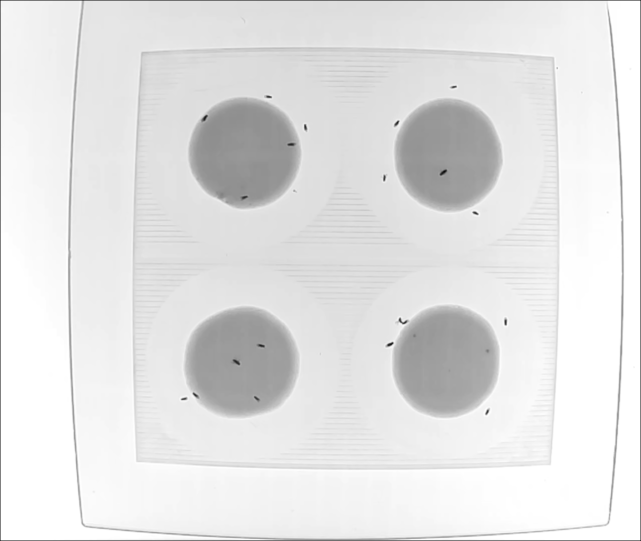

In [6]:
gray_image = Gray.(image)

In [32]:
findmin(gray_image)

(Gray{N0f8}(0.0), CartesianIndex(688, 782))

In [54]:
thresholded_image = gray_image .< 0.3;

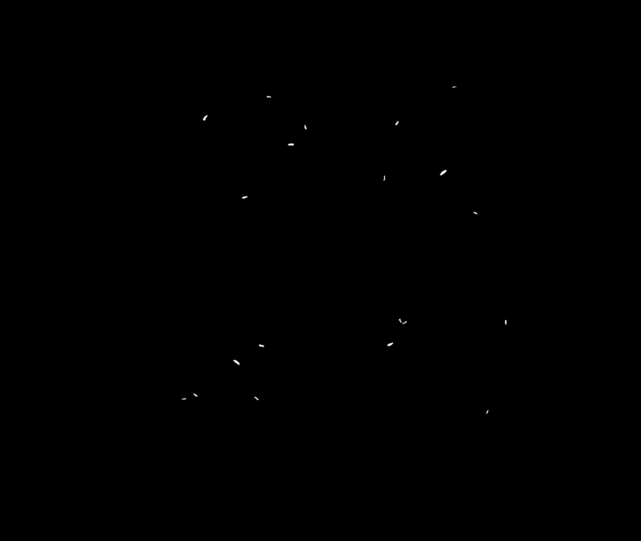

In [55]:
colorview(Gray, thresholded_image)

In [56]:
flypixels = findall(x-> x < 0.3, gray_image);
flypixels = float(hcat(getindex.(flypixels, 1), getindex.(flypixels, 2)));

In [57]:
size(flypixels)

(596, 2)

In [88]:
@time R = kmeans(flypixels', 20; max_iters=300, tol=1);

  0.000154 seconds (41 allocations: 13.375 KiB)


In [89]:
R.centers

2×20 Array{Float64,2}:
 425.6  193.15  394.882  688.318  …  642.756  393.588  796.304  725.667
 950.5  537.05  486.471  779.864     804.39   491.353  512.478  475.333

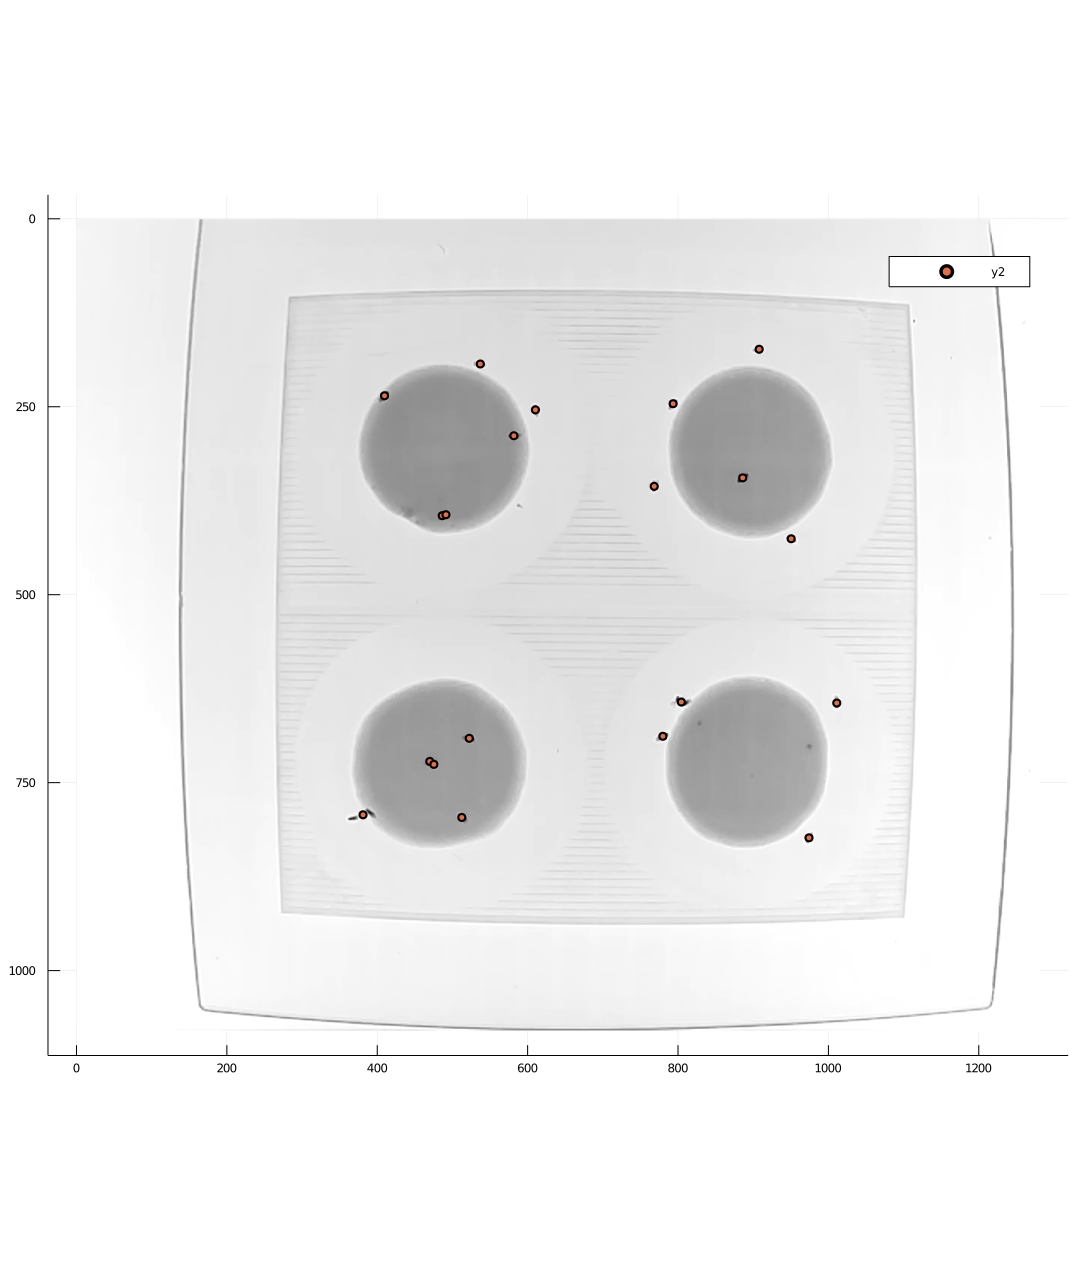

In [90]:
ratio = 1280 / 1080
plot(gray_image, size=(1080, 1280))
scatter!(R.centers[2, :], R.centers[1, :])


In [6]:
# make a random dataset with 1000 random 5-dimensional points
X = rand(5, 1000)

# cluster X into 20 clusters using K-means
R = kmeans(X, 20; maxiter=200, display=:iter)

@assert nclusters(R) == 20 # verify the number of clusters

a = assignments(R) # get the assignments of points to clusters
c = counts(R) # get the cluster sizes
M = R.centers # get the cluster centers


┌ Info: Precompiling Clustering [aaaa29a8-35af-508c-8bc3-b662a17a0fe5]
└ @ Base loading.jl:1260


  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       1.902995e+02
      1       1.489350e+02      -4.136453e+01 |       20
      2       1.392749e+02      -9.660162e+00 |       20
      3       1.345458e+02      -4.729078e+00 |       20
      4       1.319958e+02      -2.549969e+00 |       20
      5       1.303483e+02      -1.647554e+00 |       19
      6       1.292559e+02      -1.092352e+00 |       18
      7       1.287032e+02      -5.526936e-01 |       18
      8       1.282603e+02      -4.428931e-01 |       11
      9       1.280274e+02      -2.329585e-01 |       13
     10       1.278340e+02      -1.933952e-01 |       15
     11       1.275858e+02      -2.481248e-01 |       10
     12       1.271834e+02      -4.024150e-01 |       12
     13       1.269083e+02      -2.751664e-01 |       12
     14       1.267567e+02      -1.516006e-01 |        7
     15       1.265871e+02      -1.695207e-01 |       1

5×20 Array{Float64,2}:
 0.830231  0.313984  0.738634  0.810993  …  0.54284   0.194794  0.12399
 0.624043  0.254835  0.74095   0.695239     0.198248  0.290091  0.288505
 0.758817  0.269111  0.727679  0.800509     0.869874  0.247768  0.263464
 0.772142  0.792618  0.254721  0.327395     0.28918   0.557536  0.342648
 0.35676   0.754615  0.82239   0.272551     0.374801  0.212924  0.754868

In [2]:
path = "../../data/movies/4arenas_noQR.h264"
video = VideoIO.openvideo(path)

VideoReader(...)

  likely near /Users/gert-janboth/.julia/packages/IJulia/DrVMH/src/kernel.jl:52
  likely near /Users/gert-janboth/.julia/packages/IJulia/DrVMH/src/kernel.jl:52
  likely near /Users/gert-janboth/.julia/packages/IJulia/DrVMH/src/kernel.jl:52
  likely near /Users/gert-janboth/.julia/packages/IJulia/DrVMH/src/kernel.jl:52


In [25]:
images = [read(video) for _ in range(1, length=1000)];

In [39]:
function run()
    centroids = 1
    path = "../../data/movies/4arenas_noQR.h264"
    video = VideoIO.openvideo(path)
    for image in range(1, length=1000)
        img = read(video)
        flypixels = findall(x-> x < 0.3, Gray.(img))
        flypixels = float(hcat(getindex.(flypixels, 1), getindex.(flypixels, 2)))
        if centroids == 1
            R = kmeans(flypixels', 20; max_iters=300, tol=1e-4);
        else
            R = kmeans(flypixels', 20; max_iters=300, tol=1e-4, init=centroids);
        end
        centroids = R.centers
    end
end

run (generic function with 2 methods)

In [37]:
function run(images)
    centroids = 1
    for image in images
        flypixels = findall(x-> x < 0.3, Gray.(image))
        flypixels = float(hcat(getindex.(flypixels, 1), getindex.(flypixels, 2)))
        if centroids == 1
            R = kmeans(flypixels', 20; max_iters=300, tol=1e-4);
        else
            R = kmeans(flypixels', 20; max_iters=300, tol=1e-4, init=centroids);
        end
        centroids = R.centers
    end
end

run (generic function with 2 methods)

In [38]:
@time run(images)

  9.714062 seconds (797.17 k allocations: 1.386 GiB, 1.39% gc time)


In [40]:
@time run()

 12.285912 seconds (199.33 k allocations: 5.226 GiB, 3.15% gc time)


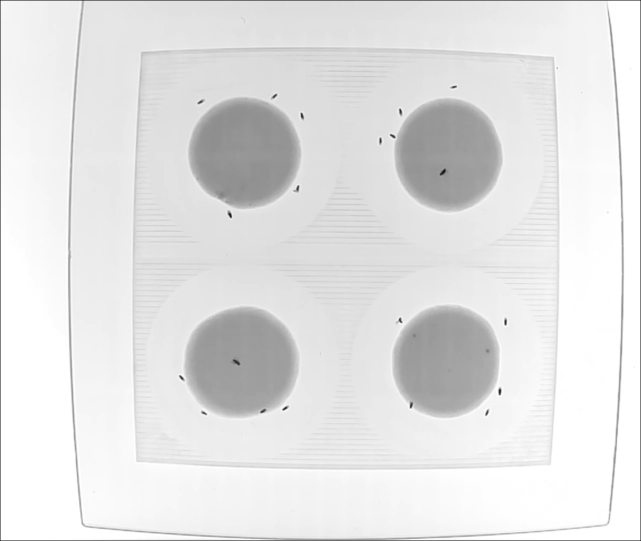

In [30]:
Gray.(images[1])

In [114]:
img = read(video)
flypixels = findall(x-> x < 0.3, Gray.(img))
flypixels = float(hcat(getindex.(flypixels, 1), getindex.(flypixels, 2)))

594×2 Array{Float64,2}:
 696.0   353.0
 695.0   354.0
 696.0   354.0
 694.0   355.0
 695.0   355.0
 696.0   355.0
 693.0   356.0
 694.0   356.0
 691.0   357.0
 692.0   357.0
 693.0   357.0
 694.0   357.0
 691.0   358.0
   ⋮    
 646.0  1011.0
 647.0  1011.0
 648.0  1011.0
 649.0  1011.0
 640.0  1012.0
 641.0  1012.0
 642.0  1012.0
 643.0  1012.0
 644.0  1012.0
 645.0  1012.0
 646.0  1012.0
 647.0  1012.0

1×562 Array{CartesianIndex{2},2}:
 CartesianIndex(788, 386)  …  CartesianIndex(647, 1012)